**Import necessary libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# IMPORT DATA
df = pd.read_csv("Desktop/Unified Data Analysis/Cost of Living /Cost_of_Living_Index_2022 - Cost_of_Living_Index_2022.csv")

***Data Cleaning***

In [11]:
# Display the first few rows of each dataset
df.head().style.background_gradient(cmap='Blues')

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.370000,2.720000,12.090000,14.920000,12.410000,23.040000
1,2,Albania,35.500000,8.470000,22.830000,29.320000,25.820000,30.190000
2,3,Algeria,26.870000,4.590000,16.430000,28.820000,14.480000,24.630000
3,4,Argentina,34.690000,7.710000,22.040000,28.170000,33.320000,30.720000
4,5,Armenia,33.890000,11.610000,23.450000,27.590000,30.550000,28.860000


In [13]:
# Find missing Values
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

There are no missing Values in this Data set.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [18]:
# Rename columns for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [20]:
df.dtypes

rank                                int64
country                            object
cost_of_living_index              float64
rent_index                        float64
cost_of_living_plus_rent_index    float64
groceries_index                   float64
restaurant_price_index            float64
local_purchasing_power_index      float64
dtype: object

**EDA Performing**

In [23]:
# Summary statistics
df.describe().style.background_gradient(cmap='Blues')

,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [25]:
# Distribution plots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [27]:
numeric_cols

Index(['rank', 'cost_of_living_index', 'rent_index',
       'cost_of_living_plus_rent_index', 'groceries_index',
       'restaurant_price_index', 'local_purchasing_power_index'],
      dtype='object')

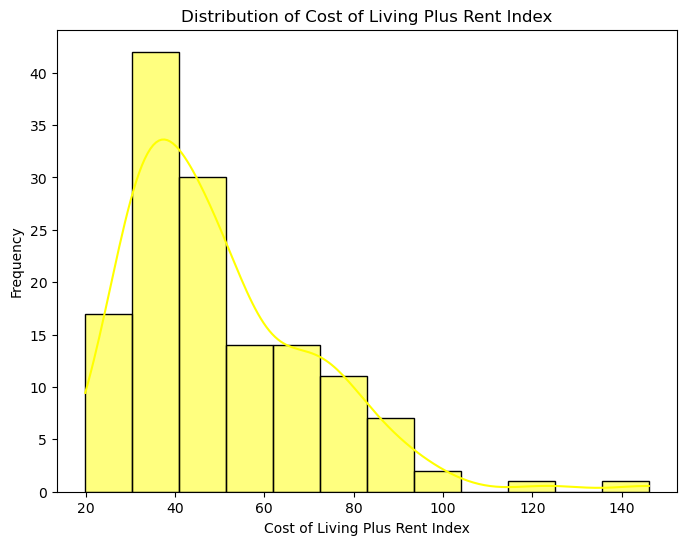

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['cost_of_living_index'], kde = True, color = 'Yellow')
plt.title('Distribution of Cost of Living Plus Rent Index')
plt.xlabel('Cost of Living Plus Rent Index')
plt.ylabel('Frequency')
plt.show()

We can see above this graph Distribution of Cost of Living and Rent index

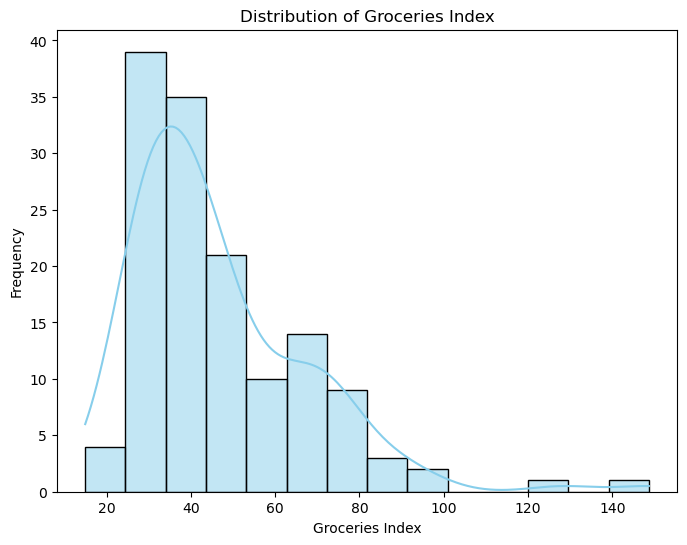

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['groceries_index'], kde=True, color='skyblue')
plt.title('Distribution of Groceries Index')
plt.xlabel('Groceries Index')
plt.ylabel('Frequency')
plt.show()

Distribution of Groceries Index Frequency easy to understand in this Graph.

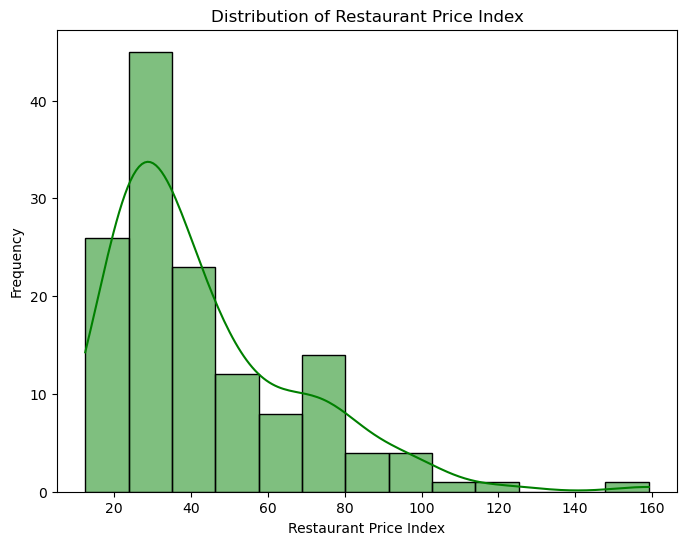

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(df['restaurant_price_index'], kde=True, color='green')
plt.title('Distribution of Restaurant Price Index')
plt.xlabel('Restaurant Price Index')
plt.ylabel('Frequency')
plt.show()

Above these Histoplot describe Distribution of Restaurant price index

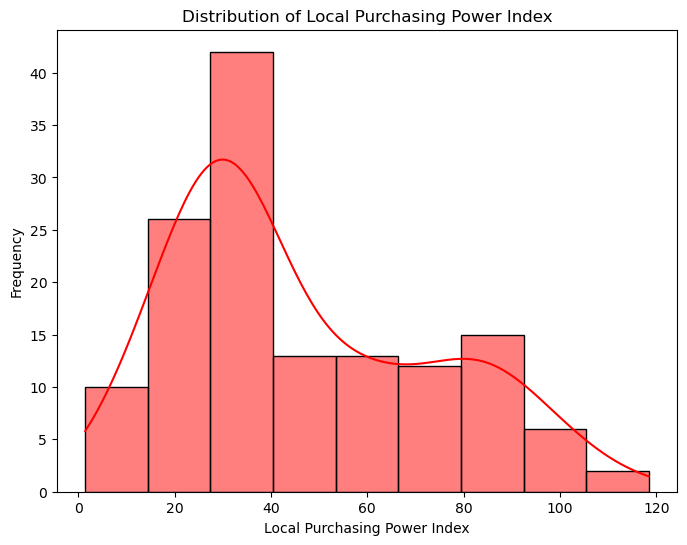

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(df['local_purchasing_power_index'], kde=True, color='red')
plt.title('Distribution of Local Purchasing Power Index')
plt.xlabel('Local Purchasing Power Index')
plt.ylabel('Frequency')
plt.show()

Distribution of Local Purchasing Power Index Frequency

**Correlation heatmap**

In [80]:
corr = df.corr(numeric_only = True)

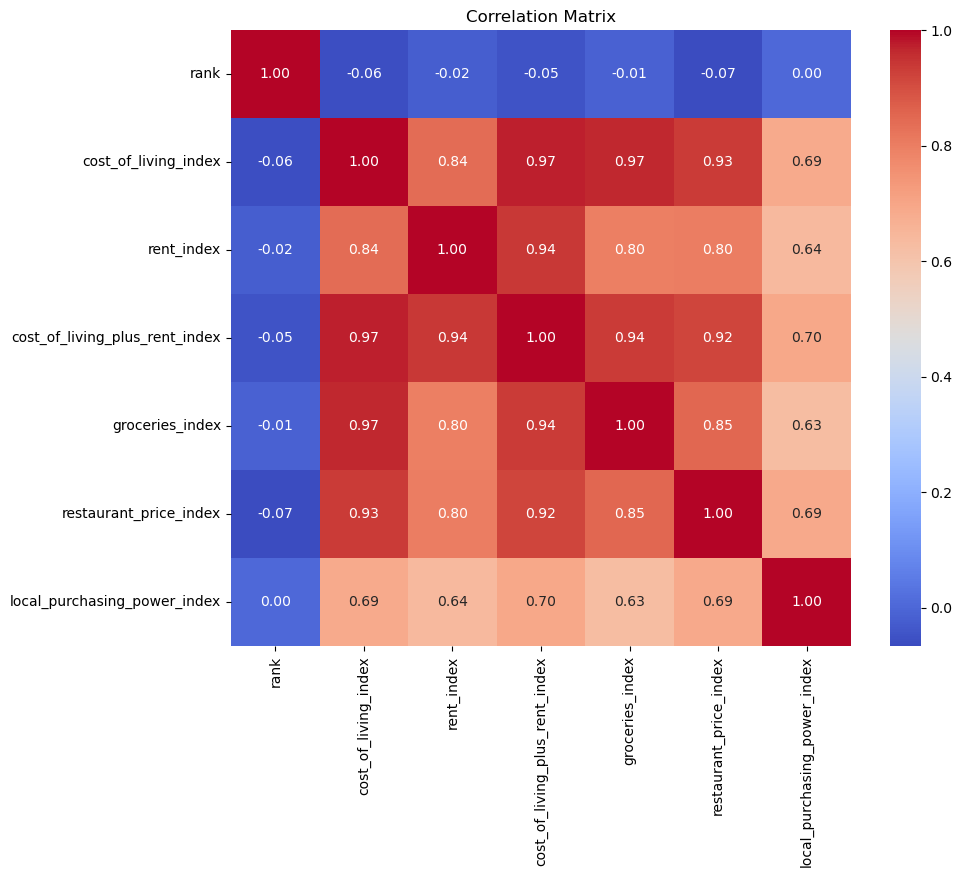

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [55]:
# Top 10 countries by Cost of Living
top10 = df[['country', 'cost_of_living_index']].sort_values(by='cost_of_living_index', ascending=False).head(10)

In [57]:
top10.style.background_gradient(cmap='Blues')

,country,cost_of_living_index
15,Bermuda,146.040000
119,Switzerland,123.350000
90,Norway,100.900000
51,Iceland,94.860000
11,Barbados,92.370000
62,Jersey,92.020000
57,Israel,88.050000
32,Denmark,84.120000
8,Bahamas,84.000000
109,Singapore,83.980000


Top 10 Country Acording to Cost of Living Index.

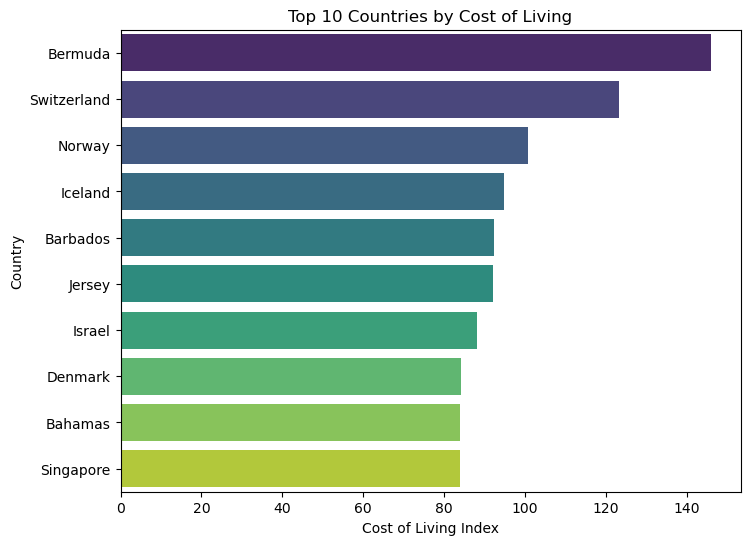

In [60]:
# Show Top 10 Country by Cost living index
plt.figure(figsize=(8,6))
sns.barplot(x='cost_of_living_index', y='country', data=top10, palette='viridis', hue = 'country')
plt.title('Top 10 Countries by Cost of Living')
plt.xlabel('Cost of Living Index')
plt.ylabel('Country')
plt.show()

Above these Barplot we can see Top 10 Country acordig to Cost of living.


In [62]:
top10_purchaisng = df[['country', 'local_purchasing_power_index']].sort_values('country', ascending = False).head(10)

In [64]:
top10_purchaisng.style.background_gradient(cmap='Blues')

,country,local_purchasing_power_index
138,Zimbabwe,19.070000
137,Zambia,40.330000
136,Yemen,14.410000
135,Vietnam,29.380000
134,Venezuela,15.410000
133,Uzbekistan,22.370000
132,Uruguay,30.070000
131,United States,106.340000
130,United Kingdom,88.780000
129,United Arab Emirates,92.170000


Top 10 Counrtry Acoridng to Purchasing Power index.

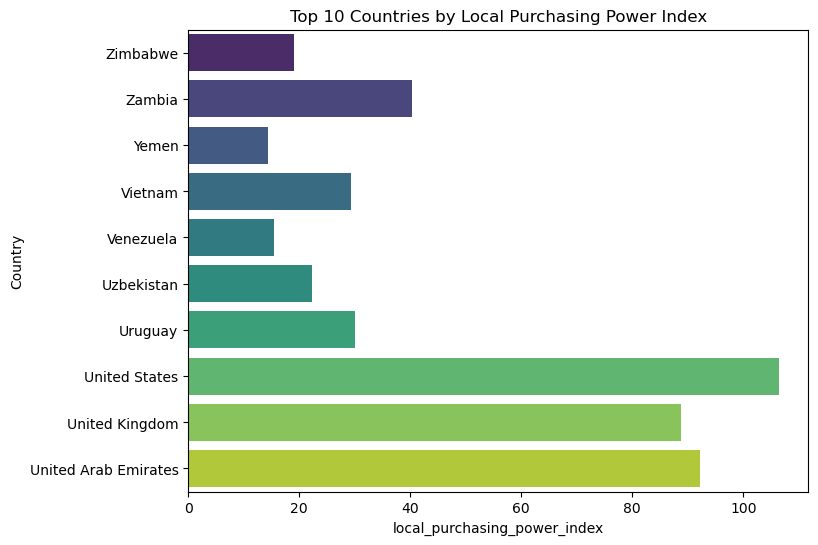

In [67]:
# Show Top 10 Country by local_purchasing_power_index
plt.figure(figsize=(8,6))
sns.barplot(x= 'local_purchasing_power_index', y = 'country', data = top10_purchaisng, palette = 'viridis', hue = 'country')
plt.title('Top 10 Countries by Local Purchasing Power Index')
plt.xlabel('local_purchasing_power_index')
plt.ylabel('Country')
plt.show()

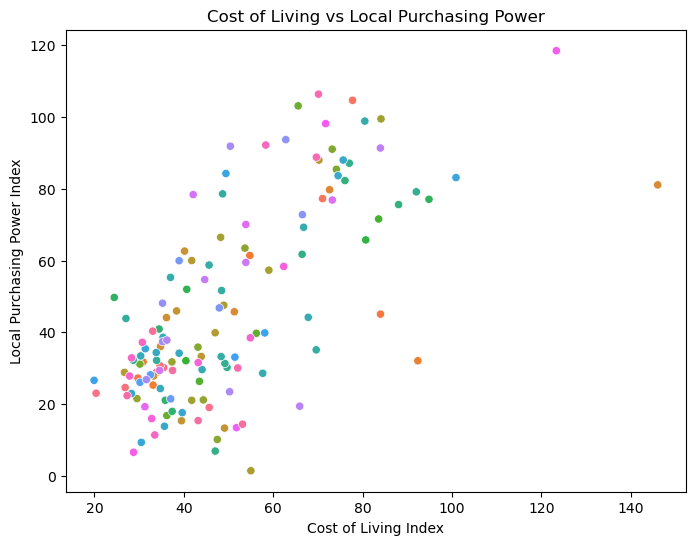

In [69]:
# Cost of Living vs Local Purchasing Power
plt.figure(figsize=(8,6))
sns.scatterplot(x='cost_of_living_index', y='local_purchasing_power_index', data=df, hue = 'country', legend=False)
plt.title('Cost of Living vs Local Purchasing Power')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()


Scatter plot showing Cost of Living and Local Purchasing Power

**Conclusion**

Costs are higher in developed countries, but rent and groceries follow similar patterns.

Purchasing power is a bit independent — not always high where cost is high.
Global inequality is clearly visible.

Most countries are affordable to live compared to a few outliers.
Most countries have moderate cost of living.
Few countries (like Switzerland, Bermuda) are very expensive.

Cost of living, rent, groceries, and restaurant prices are strongly linked — if one is high, others are usually high too.
Local purchasing power does not always match the high cost — some countries are expensive but people earn enough, others are expensive but incomes are low.
Big economic gaps exist between countries.